In [1]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from pandas.io.json import json_normalize
%matplotlib inline

In [2]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SECRET')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to plaid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [4]:
INSTITUTION_ID = "ins_109508"

In [5]:
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment='sandbox')

### 2. Generate a public token

In [6]:
# YOUR CODE HERE
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])

### 3. Exchange the public token for an access token

In [7]:
# YOUR CODE HERE
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])
myaccess_token = exchange_response['access_token']

### 4. Fetch Accounts

In [22]:
# YOUR CODE HERE
client.Accounts.get(myaccess_token)

{'accounts': [{'account_id': 'oQyXDzdVk4T35xNlgRLoIx1QdNaq7JfRqzkLq',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'gd7AXglVLKF9qWov7RGah76XomDMKEfg8w43p',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': '8AZwmryG8etXVgD41WZRsVWoJvQg3ltw3GKdb',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [135]:
# YOUR CODE HERE
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-365))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())
transactions_responses = client.Transactions.get(myaccess_token, start_date, end_date)

### 2. Print the categories for each transaction

In [136]:
# YOUR CODE HERE

categories = []
            
transactions = transactions_responses['transactions']

for transaction in transactions:
    category = transaction['category'][0]
    categories.append(category)

categories



['Travel',
 'Food and Drink',
 'Payment',
 'Food and Drink',
 'Shops',
 'Payment',
 'Travel',
 'Transfer',
 'Transfer',
 'Recreation',
 'Travel',
 'Food and Drink',
 'Food and Drink',
 'Food and Drink',
 'Transfer',
 'Travel',
 'Travel',
 'Food and Drink',
 'Payment',
 'Food and Drink',
 'Shops',
 'Payment',
 'Travel',
 'Transfer',
 'Transfer',
 'Recreation',
 'Travel',
 'Food and Drink',
 'Food and Drink',
 'Food and Drink',
 'Transfer',
 'Travel',
 'Travel',
 'Food and Drink',
 'Payment',
 'Food and Drink',
 'Shops',
 'Payment',
 'Travel',
 'Transfer',
 'Transfer',
 'Recreation',
 'Travel',
 'Food and Drink',
 'Food and Drink',
 'Food and Drink',
 'Transfer',
 'Travel',
 'Travel',
 'Food and Drink',
 'Payment',
 'Food and Drink',
 'Shops',
 'Payment',
 'Travel',
 'Transfer',
 'Transfer',
 'Recreation',
 'Travel',
 'Food and Drink',
 'Food and Drink',
 'Food and Drink',
 'Transfer',
 'Travel',
 'Travel',
 'Food and Drink',
 'Payment',
 'Food and Drink',
 'Shops',
 'Payment',
 'Travel'

### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [137]:
# YOUR CODE HERE
dates = []
names = []
amounts = []

for transaction in transactions:
    date = transaction['date']
    dates.append(date)
for transaction in transactions:
    name = transaction['name']
    names.append(name)  
for transaction in transactions:
    amount = transaction['amount']
    amounts.append(amount)    

transaction_df = pd.DataFrame(list(zip(dates, names, amounts, categories)), columns=['dates','names', 'amounts','categories'])

transaction_df.tail()


,dates,names,amounts,categories
95,2019-08-04,United Airlines,500.00,Travel
96,2019-08-02,Uber,6.33,Travel
97,2019-07-30,Tectra Inc,500.00,Food and Drink
98,2019-07-29,KFC,500.00,Food and Drink
99,2019-07-29,Madison Bicycle Shop,500.00,Shops


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [138]:
# YOUR CODE HERE
transaction_df['dates']= pd.to_datetime(transaction_df['dates'])
transaction_df['amounts']=transaction_df['amounts'].astype(float)

---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [139]:
# YOUR CODE HERE
income_response = client.Income.get(myaccess_token)
income_response

{'income': {'income_streams': [{'confidence': 0.99,
    'days': 690,
    'monthly_income': 500,
    'name': 'UNITED AIRLINES'}],
  'last_year_income': 6000,
  'last_year_income_before_tax': 7285,
  'max_number_of_overlapping_income_streams': 1,
  'number_of_income_streams': 1,
  'projected_yearly_income': 6085,
  'projected_yearly_income_before_tax': 7389},
 'request_id': 'RH4CEw76ZMW4w7J'}

In [140]:
gross_income = income_response['income']['last_year_income_before_tax']
monthly_income = income_response['income']['income_streams'][0]['monthly_income']
projected_yearly_income = monthly_income * 12

In [128]:
gross_income

7285

In [132]:
monthly_income

500

In [124]:
projected_yearly_income

6000

---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calculate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

In [141]:
category_total_df = transaction_df.filter(['categories','amounts'])
category_grouped = category_total_df.groupby(['categories']).sum()
num_category_occur = transaction_df.filter(['categories','amounts']).groupby(['categories']).count()
category_grouped['Number of Occurences'] = num_category_occur
category_grouped.columns = ['Total by Category','Number of Occurences']
category_grouped

,Total by Category,Number of Occurences
categories,,
Food and Drink,7634.38,32
Payment,12621.00,12
Recreation,471.00,6
Shops,3500.00,7
Transfer,41074.68,18
Travel,76.71,25


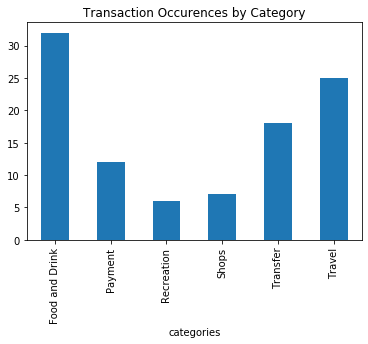

In [142]:
category_grouped['Number of Occurences'].plot.bar(title= "Transaction Occurences by Category")

### Calculate the expenses per month

In [175]:
# YOUR CODE HERE
dates = pd.to_datetime(monthly_total_df['dates'])
#monthly_total_df.groupby(['dates.%m']).value_col.sum()
monthly_total_df = transaction_df.filter(['dates','amounts'])
monthly_grouped = monthly_total_df.groupby(['dates'.index.-%m,'amounts']).sum()
monthly_grouped

SyntaxError: invalid syntax (<ipython-input-175-146a4394ee0c>, line 5)